# Import libraries and load functions

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
sns.set_theme(style='darkgrid', context='talk')
import matplotlib.ticker as mtick
import dill as pickle

In [24]:
with open('../src/add_season.pkl', 'rb') as file:
    add_season = pickle.load(file)

with open('../src/clean_team_stats.pkl', 'rb') as file:
    clean_team_stats = pickle.load(file)

with open('../src/get_win_percentage.pkl', 'rb') as file:
    get_win_percentage = pickle.load(file)

with open('../src/format_team_name.pkl', 'rb') as file:
    format_team_name = pickle.load(file)

# Load the dataset

In [25]:
df = pd.read_csv('../saves/processed/nba_data.csv')
df.head()

,Season,H_win,FG%_V,3P%_V,2P%_V,FT%_V,ORB_V,DRB_V,TRB_V,AST_V,...,FT%_H,ORB_H,DRB_H,TRB_H,AST_H,STL_H,BLK_H,TOV_H,PF_H,PTS_H
0,2013,1,0.445,0.353,0.474,0.763,9.7,32.4,42.0,21.0,...,0.779,10.2,34.5,44.7,20.1,6.7,5.4,15.1,20.4,96.7
1,2013,1,0.432,0.348,0.456,0.779,11.4,32.7,44.1,22.7,...,0.760,7.6,29.2,36.9,22.5,8.9,4.5,14.8,19.5,102.2
2,2013,1,0.474,0.352,0.525,0.730,10.5,32.5,43.0,24.6,...,0.757,9.1,32.0,41.0,24.5,7.5,5.4,15.1,19.8,103.0
3,2013,1,0.459,0.369,0.497,0.753,8.8,29.4,38.1,20.9,...,0.751,12.1,32.1,44.1,21.2,7.1,3.7,14.2,20.0,98.2
4,2013,1,0.435,0.333,0.470,0.777,12.0,30.5,42.5,21.0,...,0.782,11.4,31.1,42.5,21.2,7.0,4.2,14.1,23.0,101.3


# EDA

In [26]:
df['H_win'].value_counts()

1    6144
0    4605
Name: H_win, dtype: int64

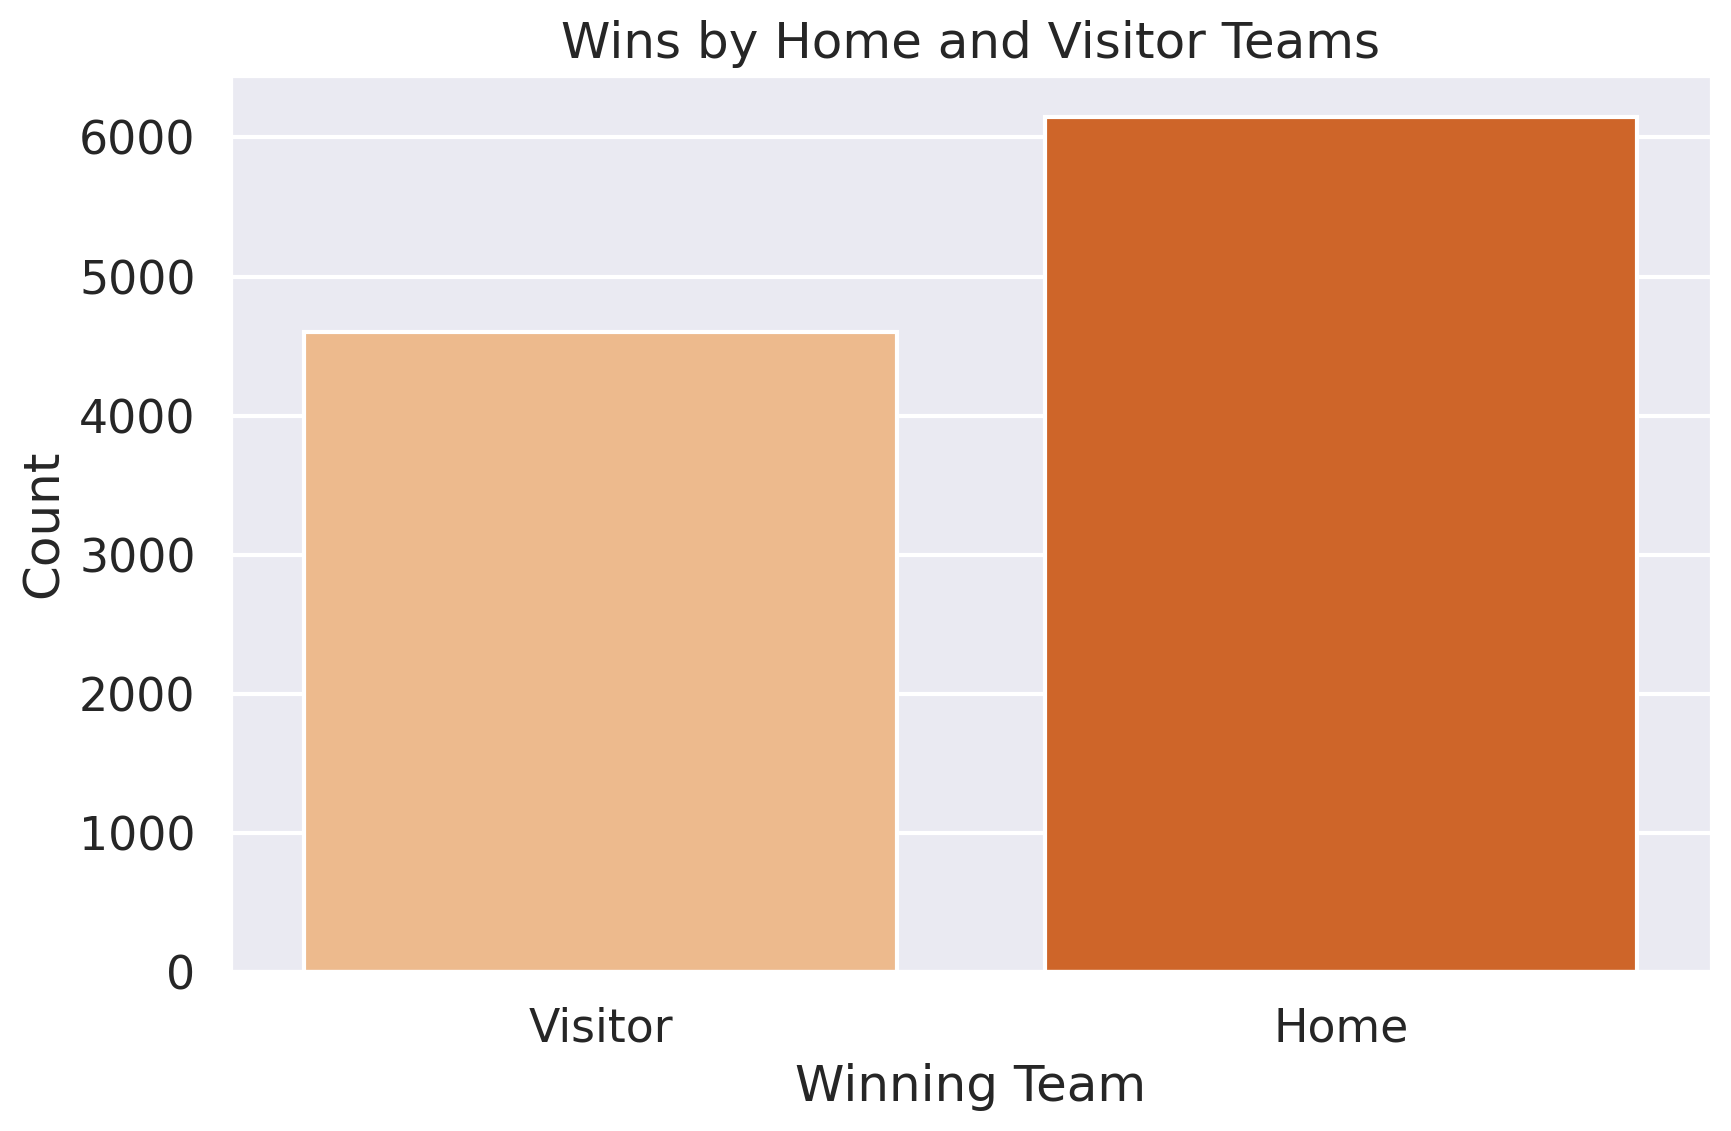

In [27]:
fig, ax = plt.subplots(figsize=(9, 6))

fig = sns.countplot(x=df['H_win'], palette='Oranges')

ax.set_title('Wins by Home and Visitor Teams')
ax.set_ylabel('Count')
ax.set_xlabel('Winning Team')
ax.set_xticklabels(labels=['Visitor', 'Home'])
plt.tight_layout()
#plt.savefig('../saves/images/total_win_count.png')
plt.show()

In [40]:
h_win_season = df.groupby('Season').mean()
h_win_season.H_win = h_win_season['H_win']*100
h_win_season

,H_win,FG%_V,3P%_V,2P%_V,FT%_V,ORB_V,DRB_V,TRB_V,AST_V,STL_V,...,FT%_H,ORB_H,DRB_H,TRB_H,AST_H,STL_H,BLK_H,TOV_H,PF_H,PTS_H
Season,,,,,,,,,,,,,,,,,,,,,
2013,58.048780,0.454600,0.358767,0.488533,0.757067,10.916667,31.836667,42.736667,22.006667,7.686667,...,0.757067,10.916667,31.836667,42.736667,22.006667,7.686667,4.713333,14.643333,20.693333,101.010000
2014,57.479675,0.449000,0.349100,0.485767,0.750667,10.876667,32.406667,43.306667,22.023333,7.730000,...,0.750667,10.876667,32.406667,43.306667,22.023333,7.730000,4.793333,14.353333,20.220000,100.016667
2015,58.861789,0.452200,0.352767,0.491633,0.757967,10.426667,33.343333,43.750000,22.286667,7.840000,...,0.757967,10.426667,33.343333,43.750000,22.286667,7.840000,4.950000,14.390000,20.256667,102.663333
2016,58.373984,0.457200,0.357167,0.503967,0.771800,10.133333,33.376667,43.520000,22.626667,7.710000,...,0.771800,10.133333,33.376667,43.520000,22.626667,7.710000,4.740000,13.960000,19.893333,105.590000
2017,57.886179,0.460267,0.361733,0.510767,0.767500,9.716667,33.806667,43.516667,23.240000,7.713333,...,0.767500,9.716667,33.806667,43.516667,23.240000,7.713333,4.803333,14.270000,19.856667,106.336667
2018,59.268293,0.460467,0.355500,0.520233,0.766967,10.346667,34.823333,45.170000,24.580000,7.623333,...,0.766967,10.346667,34.823333,45.170000,24.580000,7.623333,4.946667,14.076667,20.903333,111.203333
2019,55.146364,0.460314,0.358268,0.524239,0.772541,10.081114,34.787158,44.845231,24.382059,7.637771,...,0.772880,10.087913,34.745042,44.809443,24.388385,7.647970,4.891879,14.557318,20.785647,111.776110
2020,54.351852,0.466067,0.366033,0.530600,0.778667,9.826667,34.470000,44.300000,24.806667,7.576667,...,0.778667,9.826667,34.470000,44.300000,24.806667,7.576667,4.880000,13.826667,19.283333,112.086667
2021,54.390244,0.461233,0.353567,0.532967,0.775000,10.336667,34.113333,44.450000,24.656667,7.636667,...,0.775000,10.336667,34.113333,44.450000,24.656667,7.636667,4.720000,13.766667,19.643333,110.606667


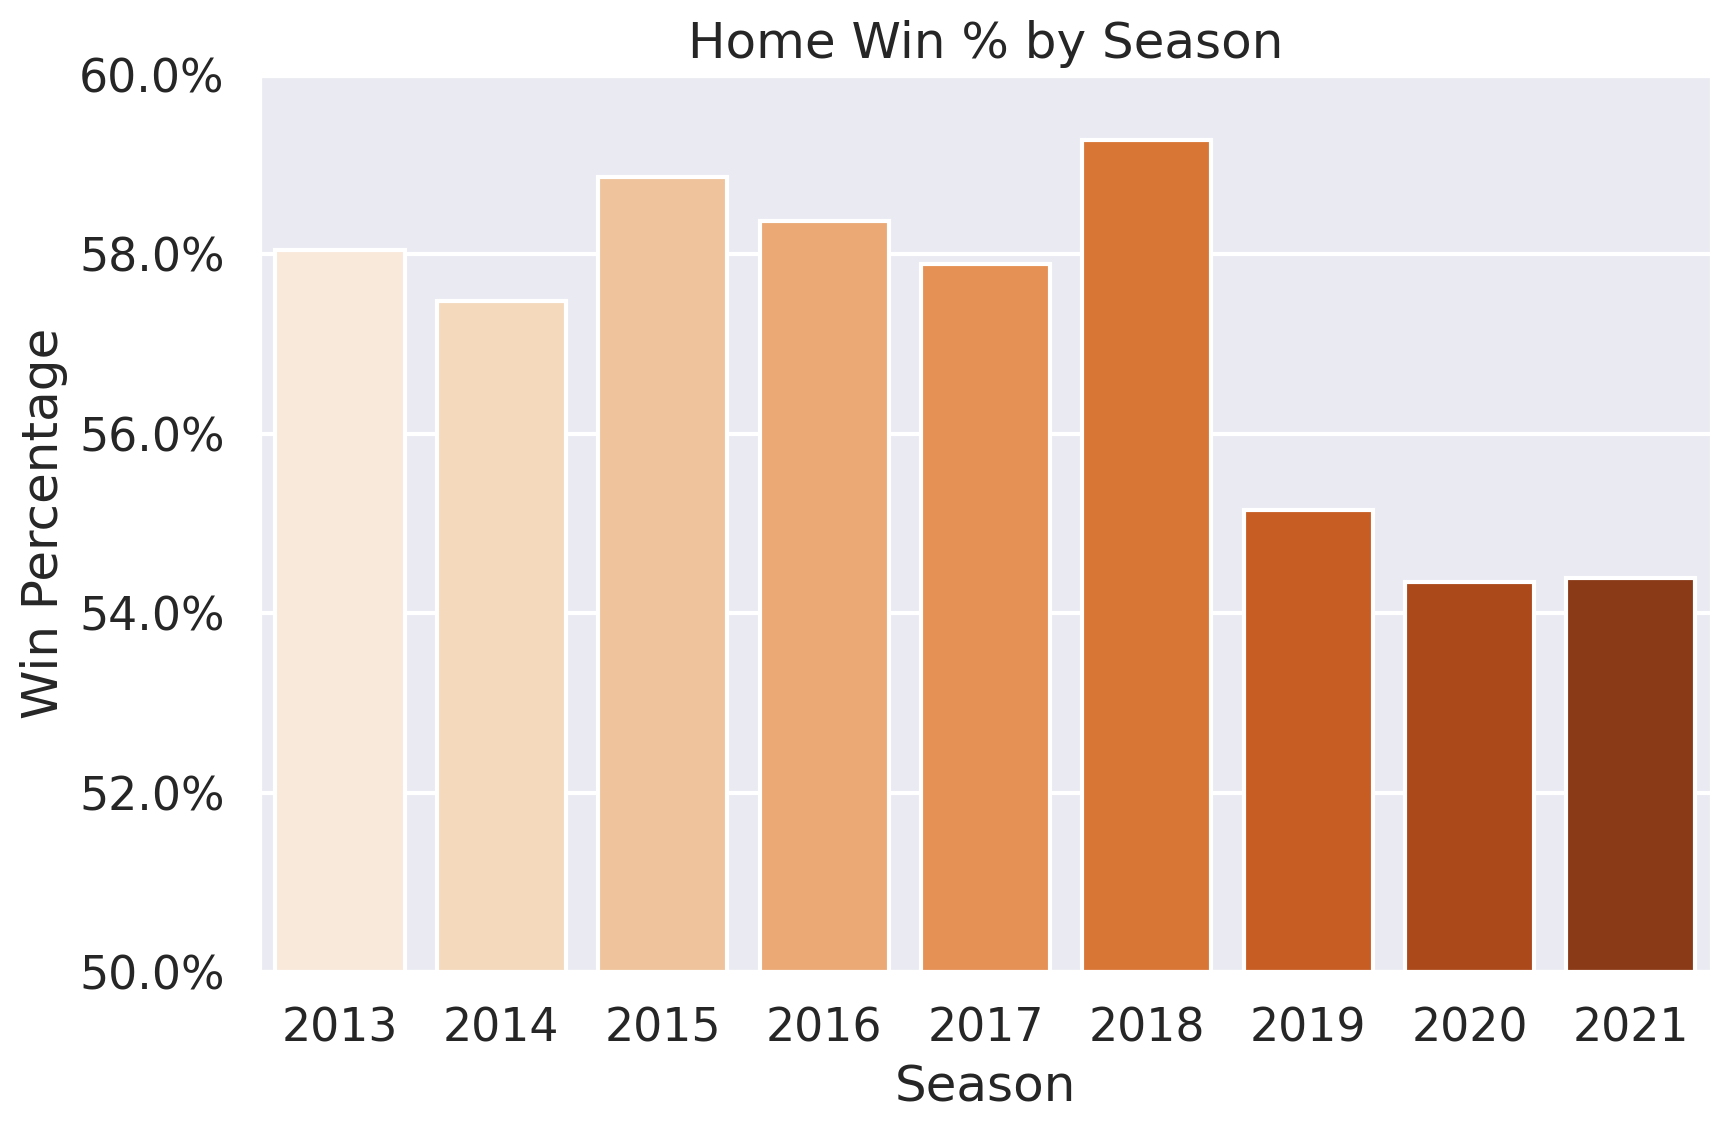

In [43]:
fig, ax = plt.subplots(figsize=(9, 6))

fig = sns.barplot(x=h_win_season.index, y='H_win', data=h_win_season, palette='Oranges', ci=None)

ax.set_title('Home Win % by Season')
ax.set_ylabel('Win Percentage')
ax.set_xlabel('Season')
ax.set_ylim(bottom=50, top=60)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
#ax.set_xticklabels(h_win_season.index, rotation = 45)
plt.tight_layout()
plt.savefig('../saves/images/yearly_win_percent.png')
plt.show()

# Load stats dataset

In [14]:
stats = pd.read_csv('../saves/processed/processed_stats.csv')
stats.head(3)

,Team,FG%,3P%,2P%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season
0,Los Angeles Clippers,0.474,0.352,0.525,0.730,10.5,32.5,43.0,24.6,8.6,4.8,13.9,21.5,107.9,2013
1,Houston Rockets,0.472,0.358,0.529,0.712,11.2,34.1,45.3,21.4,7.6,5.6,16.1,20.4,107.7,2013
2,Minnesota Timberwolves,0.444,0.341,0.478,0.778,12.5,32.2,44.7,23.9,8.8,3.6,13.9,18.3,106.9,2013


In [15]:
ppg_perseason = stats.groupby('Season')['PTS'].mean()

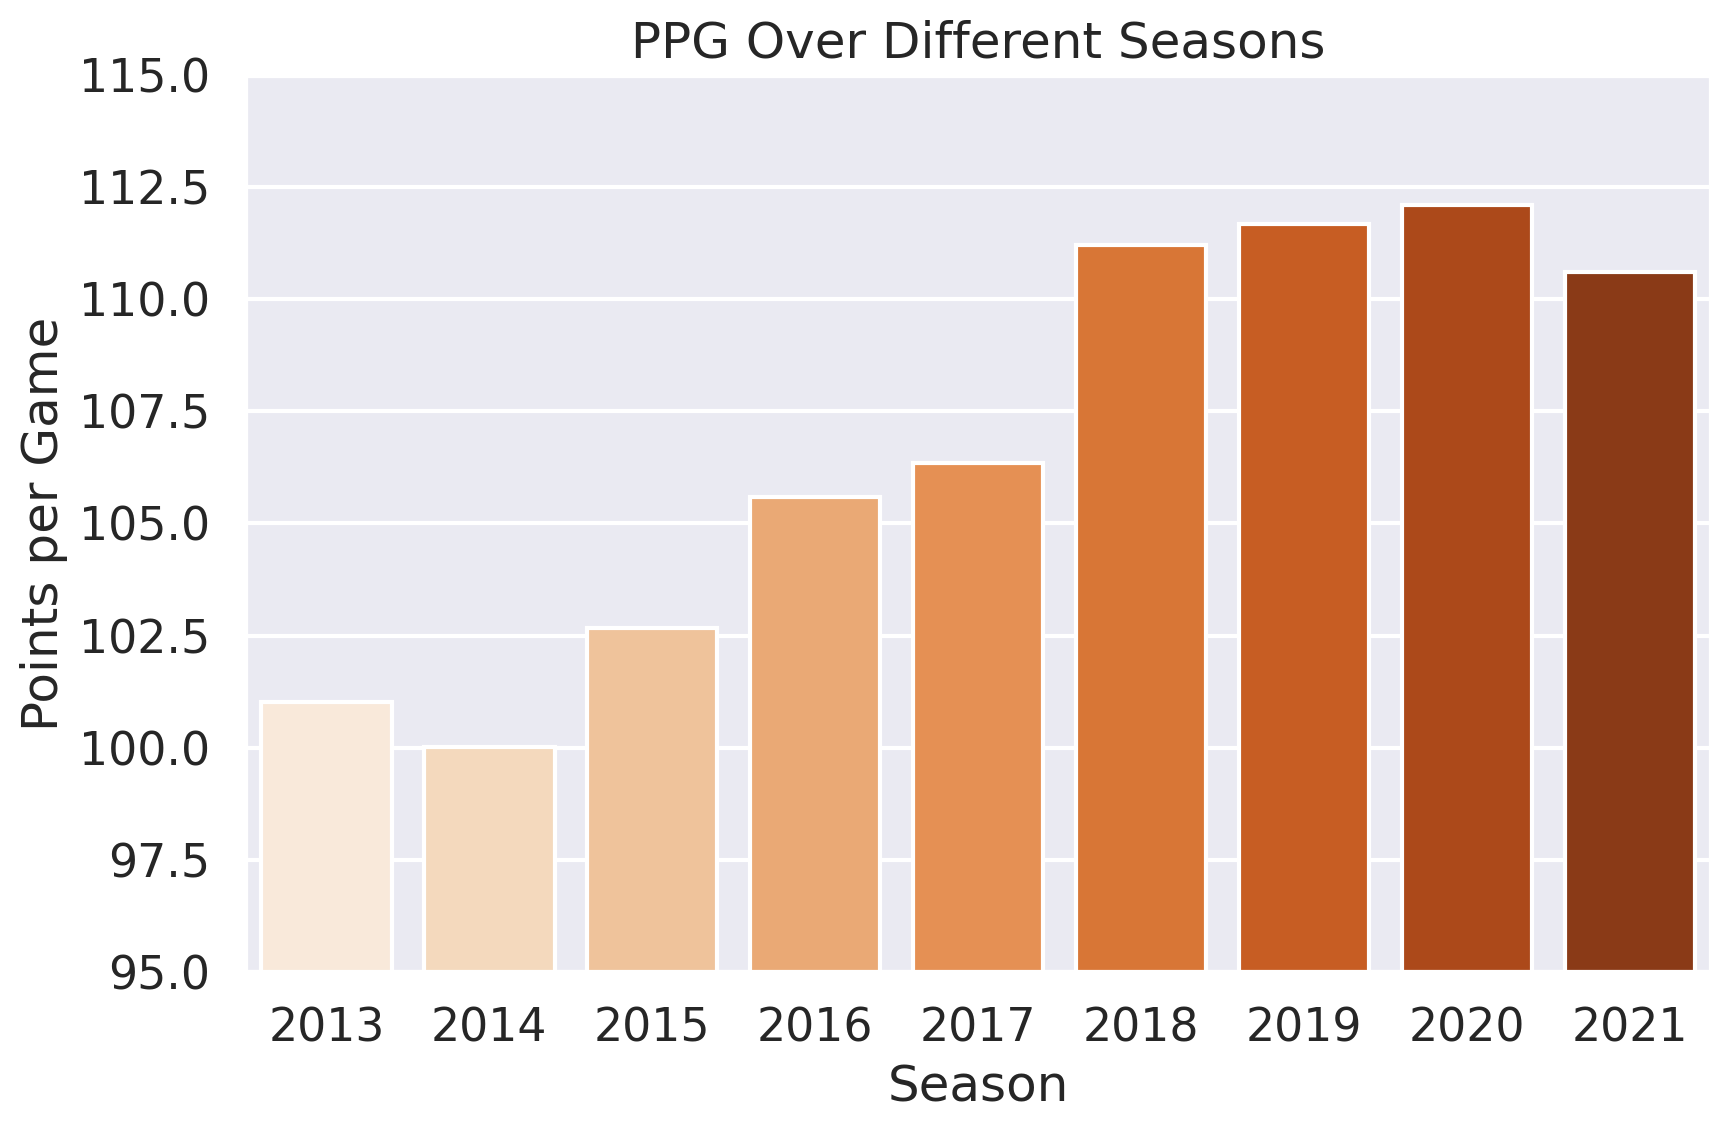

In [16]:
fig, ax = plt.subplots(figsize=(9, 6))

fig = sns.barplot(x=ppg_perseason.index, y=stats.groupby('Season')['PTS'].mean(), palette='Oranges')

ax.set_title('PPG Over Different Seasons')
ax.set_ylabel('Points per Game')
ax.set_xlabel('Season')
ax.set_ylim(bottom=95, top=115)
#ax.set_xticklabels(h_win_season.index, rotation = 45)
plt.tight_layout()
plt.savefig('../saves/images/ppg_seasons.png')
plt.show()

# Load the adv stats dataset

In [17]:
# List of csv files with adv stats
adv_csv = ['nba_2013_advstats', 'nba_2014_advstats', 'nba_2015_advstats',
           'nba_2016_advstats', 'nba_2017_advstats', 'nba_2018_advstats',
           'nba_2019_advstats', 'nba_2020_advstats', 'nba_2021_advstats']

# Create empty list
adv_list = []

# Append datasets to the list
for i in range(len(adv_csv)):
    temp_df = pd.read_csv('../data/season_adv_stats/'+adv_csv[i]+'.csv')
    adv_list.append(temp_df)

In [18]:
# Columns to be dropped
feats_to_drop = ['Rk', 'Age', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'NRtg', 'Pace', 'FTr', '3PAr', 'Unnamed: 17', 'eFG%',
       'FT/FGA', 'Unnamed: 22', 'eFG%.1', 'TOV%.1', 'FT/FGA.1', 'Unnamed: 27', 'Arena', 'Attend.', 'Attend./G']

# Format team names, add season information, drop unwanted columns
year = 2013

for df in adv_list:
    add_season(df, year)
    clean_team_stats(df, feats_to_drop)
    get_win_percentage(df)
    #get_playoff_team(df)
    year += 1

In [19]:
adv_list[0].head(3)

,Team,ORtg,DRtg,TS%,TOV%,ORB%,DRB%,Season,W%
0,San Antonio Spurs*,110.5,102.4,0.571,13.5,22.7,76.4,2013,0.756098
1,Los Angeles Clippers*,112.1,104.8,0.567,12.7,25.0,72.5,2013,0.695122
2,Oklahoma City Thunder*,110.5,103.9,0.566,14.0,26.5,75.6,2013,0.719512


In [20]:
# Create lists that will store each dataframe with 'team-feature' pairs
win_rk, ortg_rk, drtg_rk, ts_rk, tov_rk, orb_rk, drb_rk = [], [], [], [], [], [], []

for i in range(7):
    # Add each pair of 'team-feature' for each season to a list
    win_rk.append(adv_list[i][['Team', 'W%']])
    ortg_rk.append(adv_list[i][['Team', 'ORtg']])
    drtg_rk.append(adv_list[i][['Team', 'DRtg']])
    ts_rk.append(adv_list[i][['Team', 'TS%']])
    tov_rk.append(adv_list[i][['Team', 'TOV%']])
    orb_rk.append(adv_list[i][['Team', 'ORB%']])
    drb_rk.append(adv_list[i][['Team', 'DRB%']])
    
    # Create a new 'Rank' column for each feature and season
    win_rk[i]['Rank'] = win_rk[i]['W%'].rank(ascending=False)
    ortg_rk[i]['Rank'] = ortg_rk[i]['ORtg'].rank(ascending=False)
    drtg_rk[i]['Rank'] = drtg_rk[i]['DRtg'].rank()
    ts_rk[i]['Rank'] = ts_rk[i]['TS%'].rank(ascending=False)
    tov_rk[i]['Rank'] = tov_rk[i]['TOV%'].rank()
    orb_rk[i]['Rank'] = orb_rk[i]['ORB%'].rank(ascending=False)
    drb_rk[i]['Rank'] = drb_rk[i]['DRB%'].rank(ascending=False)

/tmp/ipykernel_6660/655275871.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_rk[i]['Rank'] = win_rk[i]['W%'].rank(ascending=False)
/tmp/ipykernel_6660/655275871.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ortg_rk[i]['Rank'] = ortg_rk[i]['ORtg'].rank(ascending=False)
/tmp/ipykernel_6660/655275871.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [21]:
win_ortg, win_drtg, win_ts, win_tov, win_orb, win_drb = [], [], [], [], [], []

for i in range(7):
    # append win-ortg pair to win_ortg list
    temp_df = win_rk[i].merge(ortg_rk[i], how='left', left_on=['Team'], right_on=['Team'])
    temp_df['Rank_diff'] = abs(temp_df['Rank_x'] - temp_df['Rank_y'])
    win_ortg.append(temp_df)
    
    # append win-drtg pair to win_drtg list
    temp_df = win_rk[i].merge(drtg_rk[i], how='left', left_on=['Team'], right_on=['Team'])
    temp_df['Rank_diff'] = abs(temp_df['Rank_x'] - temp_df['Rank_y'])
    win_drtg.append(temp_df)
    
    # append win-ts pair to win_ts list
    temp_df = win_rk[i].merge(ts_rk[i], how='left', left_on=['Team'], right_on=['Team'])
    temp_df['Rank_diff'] = abs(temp_df['Rank_x'] - temp_df['Rank_y'])
    win_ts.append(temp_df)
    
    # append win-tov pair to win_tov list
    temp_df = win_rk[i].merge(tov_rk[i], how='left', left_on=['Team'], right_on=['Team'])
    temp_df['Rank_diff'] = abs(temp_df['Rank_x'] - temp_df['Rank_y'])
    win_tov.append(temp_df)
    
    # append win-ts pair to win_orb list
    temp_df = win_rk[i].merge(orb_rk[i], how='left', left_on=['Team'], right_on=['Team'])
    temp_df['Rank_diff'] = abs(temp_df['Rank_x'] - temp_df['Rank_y'])
    win_orb.append(temp_df)
    
    # append win-ts pair to win_drb list
    temp_df = win_rk[i].merge(drb_rk[i], how='left', left_on=['Team'], right_on=['Team'])
    temp_df['Rank_diff'] = abs(temp_df['Rank_x'] - temp_df['Rank_y'])
    win_drb.append(temp_df)

In [19]:
win_ts[6][:10]

,Team,W%,Rank_x,TS%,Rank_y,Rank_diff
0,Milwaukee Bucks*,0.767123,1.0,0.583,3.0,2.0
1,Boston Celtics*,0.666667,5.0,0.570,12.5,7.5
2,Los Angeles Clippers*,0.680556,4.0,0.577,6.0,2.0
3,Toronto Raptors*,0.736111,2.0,0.574,8.0,6.0
4,Los Angeles Lakers*,0.732394,3.0,0.573,9.5,6.5
5,Dallas Mavericks*,0.573333,13.0,0.581,4.0,9.0
6,Miami Heat*,0.602740,11.0,0.587,1.0,10.0
7,Houston Rockets*,0.611111,9.0,0.578,5.0,4.0
8,Utah Jazz*,0.611111,9.0,0.585,2.0,7.0
9,Philadelphia 76ers*,0.589041,12.0,0.566,16.5,4.5


In [20]:
def avg_rank_differential(df_list, n_seasons):
    """Calculate the average team rank differential between win percentage and a given feature over 
    a number of n_seasons. 
    
    Args:
        df_list: list containing pandas DataFrames containing a 'Rank_diff' column.
        n_seasons: integer representing over what number of seasons to calculate the mean
        
    Returns:
        Return the average rank differential 
    
    """
    rk_diff = 0 
    
    for i in range(len(df_list)):
        rk_diff += df_list[i]['Rank_diff'].mean()
    
    avg_diff = rk_diff / n_seasons
    
    return avg_diff

In [21]:
# Calculate the average differential for each and add to a list
adv_cats = ['Off. Rating', 'Def. Rating', 'True Shooting %', 'Turnover %', 'Off. Rebound %', 'Def. Rebound %']
avg_diff_list = []

avg_diff_list.append(avg_rank_differential(win_ortg, 7))
avg_diff_list.append(avg_rank_differential(win_drtg, 7))
avg_diff_list.append(avg_rank_differential(win_ts, 7))
avg_diff_list.append(avg_rank_differential(win_tov, 7))
avg_diff_list.append(avg_rank_differential(win_orb, 7))
avg_diff_list.append(avg_rank_differential(win_drb, 7))

In [22]:
avg_rk_diff = pd.DataFrame(data=avg_diff_list, index=adv_cats, columns=['Avg. Rank Differential'])
avg_rk_diff

,Avg. Rank Differential
Off. Rating,4.390476
Def. Rating,4.933333
True Shooting %,4.880952
Turnover %,8.566667
Off. Rebound %,10.028571
Def. Rebound %,8.719048


In [23]:
def get_playoff_team(df_list):
    """Create a new pandas DataFrame column indicating if a team made the playoffs (1) or not (0) in a
    given season. 
    
    Args:
        List of pandas DataFrame with 'Team' column and '*' at the end of the team name representing a 
        playoff team.
    
    Returns: 
        New column 'Playoffs'
    
    """
    for i in range(len(df_list)):
        df_list[i]['Playoffs'] = np.where(df_list[i]['Team'].str.endswith('*'), 1, 0)

In [24]:
# Get the number of teams that made the playoffs
get_playoff_team(win_ortg)
get_playoff_team(win_drtg)
get_playoff_team(win_ts)
get_playoff_team(win_tov)
get_playoff_team(win_orb)
get_playoff_team(win_drb)

In [25]:
win_tov[2]

,Team,W%,Rank_x,TOV%,Rank_y,Rank_diff,Playoffs
0,San Antonio Spurs*,0.817073,2.0,12.4,9.0,7.0,1
1,Golden State Warriors*,0.890244,1.0,13.5,19.5,18.5,1
2,Oklahoma City Thunder*,0.670732,5.0,14.0,24.0,19.0,1
3,Cleveland Cavaliers*,0.695122,3.0,12.7,13.0,10.0,1
4,Toronto Raptors*,0.682927,4.0,12.3,7.0,3.0,1
5,Los Angeles Clippers*,0.646341,6.0,12.1,3.5,2.5,1
6,Atlanta Hawks*,0.585366,8.5,13.8,22.0,13.5,1
7,Boston Celtics*,0.585366,8.5,12.1,3.5,5.0,1
8,Charlotte Hornets*,0.585366,8.5,11.7,1.0,7.5,1
9,Utah Jazz,0.487805,19.0,14.2,26.5,7.5,0


In [26]:
def avg_n_playoff_teams(df_list, n_seasons):
    """Calculate the average number of teams that made the playoffs and figured in the top 10 for 
    a given category. 
    
    Args:
        df_list: list containing pandas DataFrames with a 'Playoffs' column representing if a team 
        made the playoffs (1) or not (0).
        n_seasons: integer representing over what number of seasons to calculate the mean
        
    Returns:
        Return the average number of playoff teams 
    
    """
    n_playoff_teams = 0 
    
    for i in range(len(df_list)):
        df_list[i] = df_list[i].sort_values(by='Rank_y')
        n_playoff_teams += df_list[i]['Playoffs'][:10].sum()
    
    avg_n_playoff_teams = n_playoff_teams / n_seasons
    
    return avg_n_playoff_teams

In [27]:
# Calculate the average number of playoff teams in the top10 of each category
avg_n_po_teams_list = []

avg_n_po_teams_list.append(avg_n_playoff_teams(win_ortg, 7))
avg_n_po_teams_list.append(avg_n_playoff_teams(win_drtg, 7))
avg_n_po_teams_list.append(avg_n_playoff_teams(win_ts, 7))
avg_n_po_teams_list.append(avg_n_playoff_teams(win_tov, 7))
avg_n_po_teams_list.append(avg_n_playoff_teams(win_orb, 7))
avg_n_po_teams_list.append(avg_n_playoff_teams(win_drb, 7))

In [28]:
avg_n_po_teams_list

[8.857142857142858,
 8.714285714285714,
 9.142857142857142,
 6.571428571428571,
 5.428571428571429,
 6.142857142857143]

In [29]:
avg_rk_diff['Avg. # POTeams in Top 10'] = avg_n_po_teams_list

In [30]:
avg_rk_diff

,Avg. Rank Differential,Avg. #POTeams in Top 10
Off. Rating,4.390476,8.857143
Def. Rating,4.933333,8.714286
True Shooting %,4.880952,9.142857
Turnover %,8.566667,6.571429
Off. Rebound %,10.028571,5.428571
Def. Rebound %,8.719048,6.142857
